## Contents

### 1. Import libraries and data
### 2. Exploring variables
### 3. Hypothesis
### 4. Reshaping variables
### 5. Regression analysis

### 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/jonathanfava/King County Housing Sales'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Raw Data', 'kc_house_data.csv'))

### 2. Exploring variables

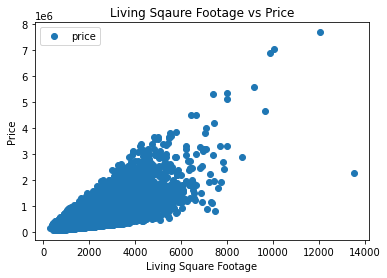

In [5]:
# create a scatterplot to view variables

df.plot(x = 'sqft_living', y='price',style='o')
plt.title('Living Sqaure Footage vs Price')  
plt.xlabel('Living Square Footage')  
plt.ylabel('Price')  
plt.show()

### 3. Hypothesis

### The larger the home the more valuable it is

### 4. Reshaping variables

In [6]:
# reshape the variables into arrays

X = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [8]:
y

array([[221900],
       [538000],
       [180000],
       ...,
       [402101],
       [400000],
       [325000]])

In [10]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [11]:
# Splitting data into a training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Regression Analysis

In [12]:
# create a regression object

regression = LinearRegression()

In [13]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

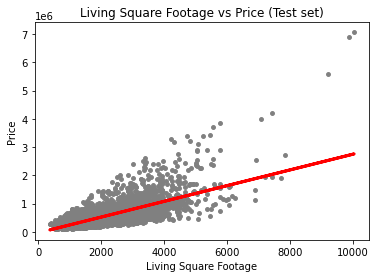

In [15]:
# create a plot that shows the regression line on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Living Square Footage vs Price (Test set)')
plot_test.xlabel('Living Square Footage')
plot_test.ylabel('Price')
plot_test.show()

### It appears that the line does not fit the data very well, which should result in a weak MSE and R2

In [16]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [17]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  70170013932.11592
R2 score:  0.48889929019453016


In [18]:
y_predicted

array([[ 360116.30871034],
       [1261900.99358095],
       [ 362899.59477476],
       ...,
       [ 560512.90534826],
       [ 374032.73903242],
       [ 329500.16200177]])

In [19]:
# create a dataframe to compare theactual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,297000,3.601163e+05
1,1578000,1.261901e+06
2,562100,3.628996e+05
3,631500,2.766177e+05
4,780000,8.471914e+05
5,485000,4.213486e+05
6,340000,4.408316e+05
7,335606,6.685044e+05
8,425000,6.467948e+05
9,490000,1.203452e+06


### The model did not preform very well with MSE being 7,017,0013,932 and a R2 score of  0.48. Similarly to the example during the exercise there are many other factors that determine the value of a home other than just the size of the home itself. 